## 와인 분류하기

In [11]:
from sklearn.datasets import load_wine
wine = load_wine()

- 데이터 전처리 및 탐색

In [12]:
import pandas as pd
import numpy as np
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [13]:
df.shape

(178, 14)

In [14]:
# 와인 등급 ( y값의 분포, 다진분류 ) 
# 나중에는 이렇게 주면 안되고 이진 분류로 줘야함 one - hot - encoding 
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

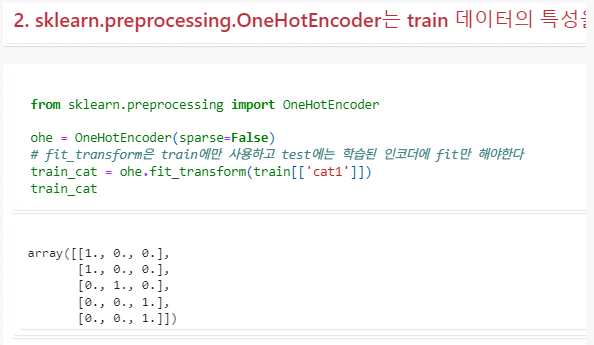

이진분류

In [15]:
wine.target_names 

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### train/Test dataset 분리

from sklearn.model_selection import train_test_split :
sklearn 라이브러리에서 model_selection.py에 있는 train_test_split 함수를 가져온것

이에 대해 검색하려면 sklearn.model_selection.train_test_split로 하면 됨

train_test_split 함수는 하나의 큰 데이터셋을 train, test 데이터로 나누는 함수 ex) 데이터1, 데이터2, ....데이터 100 이 있다면 train_test_split 함수는 train 데이터셋으로 데이터1 ~ 데이터 70, test 데이터셋으로 데이터 71~ 데이터 100으로 나눠줌

wine.data, wine,target은 wine 데이터셋 클래스 안에 있는 데이터와 답안지를 담고 있는 변수

stratift, test_size, random_state는 train_test_split 함수의 매개변수, 파라미터

stratift는 데이터를 나눌때 막무가내로 나누는게 아니라 답안지 비율에 맞게 나눠줌
ex) 데이터1 ~ 데이터 40은 답안지가 사과, 데이터 41~ 데이터 70은 답안지가 배, 데이터 71~ 데이터 100은 답안지가 포도 라고 하면 stratify를 설정하면

train 데이터셋에 사과를 28개, 배를 21개 포도를 21개 (각각 70%), test 데이터셋에 사과를 12개, 배를 9개, 포도를 9개로 나눔

만약 설정을 안하고 나눌경우에 train 데이터셋에 사과 40, 배 30개가 들어가고, test 데이터셋에 포도 30개만 들어갈 수 있으면 그렇게 되면 학습이 잘 안됨, 학습할때 포도를 학습 못하고 테스트 할때 포도만 학습하니까 

In [16]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target,
    test_size=0.2, random_state=2023 # 기억을 해두기 ( 공식 ) 
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [17]:
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([47, 57, 38], dtype=int64))

- GridSearchCv를 통한 최적의 분류기

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(random_state=2023)
params = {
    'max_depth':[2, 5, 8],
    'min_samples_split':[2, 3, 4]
}
grid_dt = GridSearchCV(
    dtc, params, scoring='accuracy', cv=5
)
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2023),
             param_grid={'max_depth': [2, 5, 8],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [19]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2023)

In [21]:
grid_dt.best_params_

{'max_depth': 8, 'min_samples_split': 4}

In [22]:
dtc = DecisionTreeClassifier(random_state=2023)
params = {
    'max_depth':[6, 7, 8, 9, 10],
    'min_samples_split':[3, 4, 5, 6]
}
grid_dt = GridSearchCV(
    dtc, params, scoring='accuracy', cv=5
)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2023),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 6]},
             scoring='accuracy')

In [23]:
grid_dt.best_params_

{'max_depth': 6, 'min_samples_split': 4}

- Best model 로 예측 /평가

In [25]:
best_dt=grid_dt.best_estimator_
pred = best_dt.predict(X_test)
rf = pd.DataFrame({'y 실제값': y_test, 'y 예측값':pred})
rf.head()

,y 실제값,y 예측값
0,2,2
1,2,2
2,2,2
3,0,0
4,1,1


In [26]:
best_dt.score(X_test,y_test)

0.9166666666666666